<a href="https://colab.research.google.com/github/AmoghUpadhayay/Machine-Learning-Projects/blob/main/Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.gutenberg.org/files/1661/1661-0.txt -o book.txt

In [2]:
text=open('1661-0.txt','r',encoding='utf-8').read()
text=text.lower()

In [3]:
type(text)

str

In [4]:
sentences=text.split('\n')

In [5]:
type(sentences)

list

In [14]:
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [7]:
tokenizer=Tokenizer(num_words=None,oov_token='<UNK>')  
tokenizer.fit_on_texts(sentences) 

In [8]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

8915

In [10]:
sequences=tokenizer.texts_to_sequences(sentences)

In [9]:
tokenizer.word_index

{'<UNK>': 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'of': 5,
 'a': 6,
 'i': 7,
 '”': 8,
 'in': 9,
 'that': 10,
 'it': 11,
 'he': 12,
 'was': 13,
 'you': 14,
 'his': 15,
 'is': 16,
 'my': 17,
 'have': 18,
 'with': 19,
 'as': 20,
 'had': 21,
 'at': 22,
 'which': 23,
 'for': 24,
 'be': 25,
 'not': 26,
 'me': 27,
 'but': 28,
 'from': 29,
 'we': 30,
 'this': 31,
 'said': 32,
 'upon': 33,
 'there': 34,
 'holmes': 35,
 'him': 36,
 'so': 37,
 'her': 38,
 'she': 39,
 'all': 40,
 '’': 41,
 'been': 42,
 'your': 43,
 'on': 44,
 'very': 45,
 'by': 46,
 'one': 47,
 'are': 48,
 '“i': 49,
 'were': 50,
 'an': 51,
 'no': 52,
 'would': 53,
 'out': 54,
 'what': 55,
 'then': 56,
 'up': 57,
 'when': 58,
 'man': 59,
 'could': 60,
 'has': 61,
 'do': 62,
 'into': 63,
 'or': 64,
 'little': 65,
 'will': 66,
 'who': 67,
 'mr': 68,
 'if': 69,
 'some': 70,
 'down': 71,
 'see': 72,
 'now': 73,
 'our': 74,
 'may': 75,
 'should': 76,
 'am': 77,
 'us': 78,
 'over': 79,
 'they': 80,
 'can': 81,
 'more': 82,
 'think': 83,
 'ab

In [11]:
input_sequences=[]
for sequence in sequences:
  for i in range(1,len(sequence)):
    n_gram_sequence=sequence[:i+1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[0],input_sequences[1])

[4775, 145] [4775, 145, 132]


In [12]:
max_seq_len=max([len(seq) for seq in input_sequences])
max_seq_len

20

In [15]:
padded_sequences=pad_sequences(input_sequences,maxlen=max_seq_len)
print(padded_sequences[0],padded_sequences[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 4775  145] [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 4775  145  132]


In [16]:
import numpy as np
padded_sequences=np.array(padded_sequences)

In [17]:
x=padded_sequences[:,:-1]
labels=padded_sequences[:,-1]

In [18]:
y=tf.keras.utils.to_categorical(labels,num_classes=vocab_size)

In [19]:
print(x.shape,y.shape)

(101575, 19) (101575, 8915)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [21]:
model=Sequential([
    Embedding(vocab_size,100,input_length=max_seq_len-1), 
    Bidirectional(LSTM(256)),
    Dense(vocab_size,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           891500    
                                                                 
 bidirectional (Bidirectiona  (None, 512)              731136    
 l)                                                              
                                                                 
 dense (Dense)               (None, 8915)              4573395   
                                                                 
Total params: 6,196,031
Trainable params: 6,196,031
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['acc'])

In [24]:
es=EarlyStopping(monitor='acc',min_delta=0.01,patience=10)

In [25]:
model.fit(x,y,epochs=50,batch_size=512,verbose=1,callbacks=[es])

Epoch 1/50
199/199 [==============================] - 15s 36ms/step - loss: 6.1976 - acc: 0.0859
Epoch 2/50
199/199 [==============================] - 7s 35ms/step - loss: 5.3065 - acc: 0.1430
Epoch 3/50
199/199 [==============================] - 7s 36ms/step - loss: 4.7737 - acc: 0.1732
Epoch 4/50
199/199 [==============================] - 7s 36ms/step - loss: 4.2629 - acc: 0.2041
Epoch 5/50
199/199 [==============================] - 7s 37ms/step - loss: 3.7646 - acc: 0.2446
Epoch 6/50
199/199 [==============================] - 7s 36ms/step - loss: 3.3251 - acc: 0.2960
Epoch 7/50
199/199 [==============================] - 7s 36ms/step - loss: 2.9568 - acc: 0.3480
Epoch 8/50
199/199 [==============================] - 7s 36ms/step - loss: 2.6571 - acc: 0.3950
Epoch 9/50
199/199 [==============================] - 7s 36ms/step - loss: 2.3984 - acc: 0.4398
Epoch 10/50
199/199 [==============================] - 7s 36ms/step - loss: 2.1915 - acc: 0.4799
Epoch 11/50
199/199 [=================

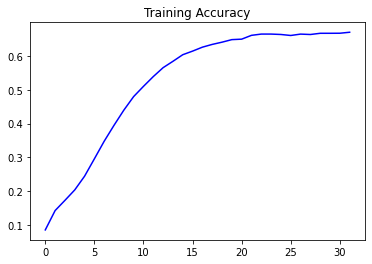

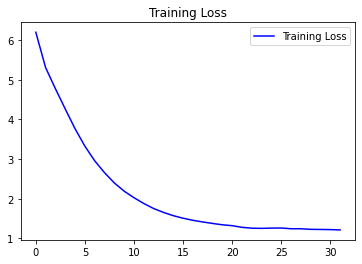

In [26]:
import matplotlib.pyplot as plt

history=model.history
acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.title("Training Accuracy")

plt.figure()

plt.plot(epochs,loss,'b',label='Training Loss')
plt.title("Training Loss")
plt.legend()